<a href="https://colab.research.google.com/github/gioliveirass/fatec-AM-classificationMushrooms/blob/main/classification_mushrooms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍄 Classificação de cogumelos 🍄

O presente script tem como objetivo realizar o treinamento de um algoritmo de classificação para identificar se um cogumelo é venenoso ou comestível com base em suas características. O projeto foi desenvolvido durante a aula de Aprendizagem de Máquinas da Fatec de SJC.

+ 👁‍🗨 Para saber mais, acesse o GitHub do projeto: https://github.com/gioliveirass/fatec-AM-classificationMushrooms

## ⭐️ Importando bibliotecas necessária

Antes de iniciar o desenvolvimento do código em sí, é necessário importar algumas bibliotecas.

In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from catboost import CatBoostClassifier, Pool, metrics, cv

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

## ⭐️ Selecionando base de dados

Para treinar o algoritmo, iremos utilizar uma base de dados disponível no [Kaggle](https://www.kaggle.com/), uma comunidade on-line de cientistas de dados e praticantes de aprendizado de máquina. Para acessar informações sobre a base de dados utilizada, [clique aqui](https://www.kaggle.com/datasets/uciml/mushroom-classification).

In [ ]:
# Lendo informações do dataset
url_dataset = 'https://raw.githubusercontent.com/gioliveirass/fatec-AM-classificationMushrooms/main/mushrooms_dataset.csv'
mushrooms = pd.read_csv(url_dataset, sep = ',')
mushrooms.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## ⭐️ Identificando e removendo ruídos

A base de dados selecionadas já possui o valores padronizados, portanto iremos realizar somente algumas validações para evitar problemas.

In [ ]:
# Identificando tipo de valores
mushrooms.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
# Identificando se há algum valor nulo
print(mushrooms.isnull().sum())

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


💭 Como nenhum ruído foi identificado, não foi necessário realizar a remoção ou padronização de nenhum registro.

## ⭐️ Seleção de dados para treinamento

Tendo "limpado" e normalizado a base de dados escolhida, é o momento ideal para separar as informações necessárias para criar e treinar o algoritmo de classificação.

In [ ]:
# Definindo o que se quer descobrir
y = mushrooms['class']
y.head(5)

0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object

In [ ]:
# Definindo o que será usado para treinar
x = mushrooms.drop(['class'], axis=1)
x.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [ ]:
# Selecionando as informações para treinamento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
# Selecionando features
categorical_features = np.where(x.dtypes == object)[0]
print(categorical_features)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


## ⭐️ Criando e treinando algoritmo de classificação

Após separar as informações necessárias, podemos finalmente criar um modelo e realizar o treinamento. Para isso, foi utilizado a biblioteca [Catboost](https://catboost.ai/).

In [ ]:
# Criando modelo
model = CatBoostClassifier(
    custom_loss=[metrics.Accuracy()],
    # random_seed=42,
    random_seed=22,
    logging_level='Silent'
)

In [ ]:
# Treinando o algoritmo
model.fit(
    x_train, y_train,
    cat_features=categorical_features,
    eval_set=(x_test, y_test),
    plot=False
);

## ⭐️ Analisando resultados

Para analisar os resultados do treinamento, iremos verificar a acurácia e a matriz de confusão.

In [ ]:
# Predição
y_pred = model.predict(x_test)

In [ ]:
# Acurácia
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia: {:.2f}".format(accuracy))

Acurácia: 1.00


Matriz de Confusão


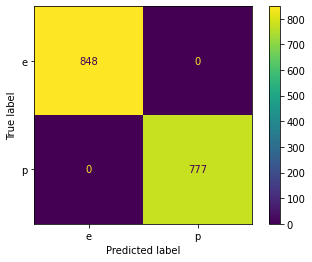

In [ ]:
# Matriz de confusão
print('Matriz de Confusão')
confusion_matrix = confusion_matrix(y_test, y_pred, labels=y_train.unique())
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=y_train.unique())
disp.plot()

💭 Significado das siglas (traduzido):
+ p = venenoso;
+ e = comestível.